# Human Activity Recognition using sensor data

#### Author: Santiago Ruiz

##### Description

This code performs training and validation for human activity recognition activities based on a series of feature vectors.
The classification is made for the following categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying.

# **Set up**


In [10]:
import numpy as np
import sklearn
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

import pickle

# Import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix,zero_one_loss
from sklearn.metrics import roc_auc_score, auc, classification_report

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# **Load data**

Training and testing data are obtained from https://www.smartlab.unige.net/:
Human Activity Recognition Using Smartphones Data Set
SmartLab:University of Genoa

Number of instances : 10299
Number of attributes: 561

- Training data (~70%)
- Testing data  (~30%)

In [2]:
X_train = np.loadtxt(r"C:\Users\sruiz2\Box\Fall 2022\Data Science\Final_project\Data\Training\X_train.txt")
y_train = np.loadtxt(r"C:\Users\sruiz2\Box\Fall 2022\Data Science\Final_project\Data\Training\y_train.txt")
X_test  = np.loadtxt(r"C:\Users\sruiz2\Box\Fall 2022\Data Science\Final_project\Data\Testing\X_test.txt")
y_test  = np.loadtxt(r"C:\Users\sruiz2\Box\Fall 2022\Data Science\Final_project\Data\Testing\y_test.txt")

# **Model training and Evaluation**

### Support Vector Machine

#### Initial Model Training

In [4]:
# Training
svm_clf = svm.SVC(random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [5]:
# Evaluation
svm_prediction = svm_clf.predict(X_test)
Acc_svm = accuracy_score(y_test, svm_prediction)*100
print(svm_clf.__class__.__name__,Acc_svm)

SVC 95.04580929759076


#### Hyperparameter Optimization

In [6]:
# parameter_space = {
#     'C': [0.2, 0.5, 1], 
#     'kernel': ['linear','poly','rbf','sigmoid'],
#     'gamma': ['scale','auto'],
# }

# svm_clf = GridSearchCV(svm_clf, parameter_space, n_jobs=-1, cv=5)
# svm_clf.fit(X_train, y_train) 

In [7]:
# print('Best parameters found:\n', svm_clf.best_params_)

#### Final Model

In [8]:
svm_clf = svm.SVC(C= 0.5, gamma= 'scale', kernel= 'linear', random_state=42)
svm_clf.fit(X_train, y_train)

svm_prediction = svm_clf.predict(X_test)

#### Metrics

In [11]:
Acc_svm = accuracy_score(y_test, svm_prediction)*100
print(svm_clf.__class__.__name__,Acc_svm)

results_svm = confusion_matrix(y_test, svm_prediction)

FP = results_svm.sum(axis=0) - np.diag(results_svm)  
FN = results_svm.sum(axis=1) - np.diag(results_svm)
TP = np.diag(results_svm)
TN = results_svm.sum() - (FP + FN + TP)

print('\n True Positive: \n', TP)
print('\n True Negative: \n', TN)
print('\n False Positive: \n', FP)
print('\n False Negative: \n', FN)

print(classification_report(y_test,svm_prediction, digits=4))
print('Accuracy:',Acc_svm)
print('\n Confussion Matrix: \n', results_svm)



SVC 96.26739056667797

 True Positive: 
 [492 451 410 433 514 537]

 True Negative: 
 [2429 2467 2522 2438 2359 2410]

 False Positive: 
 [22  9  5 18 56  0]

 False Negative: 
 [ 4 20 10 58 18  0]
              precision    recall  f1-score   support

         1.0     0.9572    0.9919    0.9743       496
         2.0     0.9804    0.9575    0.9689       471
         3.0     0.9880    0.9762    0.9820       420
         4.0     0.9601    0.8819    0.9193       491
         5.0     0.9018    0.9662    0.9328       532
         6.0     1.0000    1.0000    1.0000       537

    accuracy                         0.9627      2947
   macro avg     0.9646    0.9623    0.9629      2947
weighted avg     0.9636    0.9627    0.9626      2947

Accuracy: 96.26739056667797

 Confussion Matrix: 
 [[492   1   3   0   0   0]
 [ 18 451   2   0   0   0]
 [  4   6 410   0   0   0]
 [  0   2   0 433  56   0]
 [  0   0   0  18 514   0]
 [  0   0   0   0   0 537]]


In [12]:
TP/(TP+FP)

array([0.95719844, 0.98043478, 0.98795181, 0.96008869, 0.90175439,
       1.        ])

## Random Forest Classifier

#### Initial Model Training and Evaluation

In [13]:
# Training
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Evaluation
rnd_prediction = rnd_clf.predict(X_test)
Acc_rnd = accuracy_score(y_test, rnd_prediction)*100
print(rnd_clf.__class__.__name__,Acc_rnd)

RandomForestClassifier 92.56871394638615


#### Hyperparameter Optimization

In [15]:
# rnd_clf = RandomForestClassifier(random_state=42)

# parameter_space = {
#     'n_estimators': [50, 100, 150, 200], 
#     'criterion': ['gini','entropy','log_loss'],
#     'max_features': ['sqrt','log2'],
# }

# rnd_clf = GridSearchCV(rnd_clf, parameter_space, n_jobs=-1, cv=5)
# rnd_clf.fit(X_train, y_train) 

In [16]:
# print('Best parameters found:\n', rnd_clf.best_params_)

#### Final Model

In [17]:
rnd_clf = RandomForestClassifier(n_estimators=150, criterion= 'entropy', max_features= 'sqrt', random_state=42)
rnd_clf.fit(X_train, y_train)

rnd_prediction = rnd_clf.predict(X_test)

#### Metrics

In [18]:
Acc_rnd = accuracy_score(y_test, rnd_prediction)*100
results_rnd = confusion_matrix(y_test, rnd_prediction)

FP = results_rnd.sum(axis=0) - np.diag(results_rnd)  
FN = results_rnd.sum(axis=1) - np.diag(results_rnd)
TP = np.diag(results_rnd)
TN = results_rnd.sum() - (FP + FN + TP)

print('\n True Positive: \n', TP)
print('\n True Negative: \n', TN)
print('\n False Positive: \n', FP)
print('\n False Negative: \n', FN)

print(classification_report(y_test,rnd_prediction, digits=4))
print('Accuracy:',Acc_rnd)
print('\n Confussion Matrix: \n', results_rnd)


 True Positive: 
 [484 428 361 435 505 537]

 True Negative: 
 [2394 2432 2514 2429 2359 2410]

 False Positive: 
 [57 44 13 27 56  0]

 False Negative: 
 [12 43 59 56 27  0]
              precision    recall  f1-score   support

         1.0     0.8946    0.9758    0.9335       496
         2.0     0.9068    0.9087    0.9077       471
         3.0     0.9652    0.8595    0.9093       420
         4.0     0.9416    0.8859    0.9129       491
         5.0     0.9002    0.9492    0.9241       532
         6.0     1.0000    1.0000    1.0000       537

    accuracy                         0.9332      2947
   macro avg     0.9347    0.9299    0.9312      2947
weighted avg     0.9347    0.9332    0.9329      2947

Accuracy: 93.31523583305056

 Confussion Matrix: 
 [[484   5   7   0   0   0]
 [ 37 428   6   0   0   0]
 [ 20  39 361   0   0   0]
 [  0   0   0 435  56   0]
 [  0   0   0  27 505   0]
 [  0   0   0   0   0 537]]


## Artificial Neural Network

#### Initial Model Training

In [19]:
# Training
nrn_clf = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(10, 5), random_state=42, max_iter=1000, activation='relu' )
nrn_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)

In [20]:
# Evaluation
nrn_prediction = nrn_clf.predict(X_test)
Acc_nrn = accuracy_score(y_test, nrn_prediction)*100
print(nrn_clf.__class__.__name__,Acc_nrn)

MLPClassifier 95.18154054971157


#### Hyperparameter Optimization

In [21]:
# mlp_gs = MLPClassifier(max_iter=1000)
# parameter_space = {
#     'hidden_layer_sizes': [(10, 2),(10, 5),(10,30,10),(20,),(30,)],
#     'activation': ['relu'],
#     'solver': ['adam'],
#     'alpha': [0.00001, 0.0001, 0.05, 0.1, 0.2],
#     'learning_rate': ['constant','adaptive'],
# }

# nrn_clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
# nrn_clf.fit(X_train, y_train)

In [22]:
# print('Best parameters found:\n', nrn_clf.best_params_)

#### Final Model

In [23]:
nrn_clf = MLPClassifier(solver='adam', alpha=0.05, hidden_layer_sizes=(20,), 
                        random_state=42, max_iter=1000, activation='relu',learning_rate='adaptive')
nrn_clf.fit(X_train, y_train)

nrn_prediction = nrn_clf.predict(X_test)


#### Metrics

In [25]:
Acc_nrn = accuracy_score(y_test, nrn_prediction)*100
results_nrn = confusion_matrix(y_test, nrn_prediction)

FP = results_nrn.sum(axis=0) - np.diag(results_nrn)  
FN = results_nrn.sum(axis=1) - np.diag(results_nrn)
TP = np.diag(results_nrn)
TN = results_nrn.sum() - (FP + FN + TP)

print('\n True Positive: \n', TP)
print('\n True Negative: \n', TN)
print('\n False Positive: \n', FP)
print('\n False Negative: \n', FN)

print(classification_report(y_test,nrn_prediction, digits=4))
print('Accuracy:',Acc_nrn)
print('\n Confussion Matrix: \n', results_nrn)


 True Positive: 
 [493 444 405 434 520 537]

 True Negative: 
 [2420 2463 2523 2445 2361 2409]

 False Positive: 
 [31 13  4 11 54  1]

 False Negative: 
 [ 3 27 15 57 12  0]
              precision    recall  f1-score   support

         1.0     0.9408    0.9940    0.9667       496
         2.0     0.9716    0.9427    0.9569       471
         3.0     0.9902    0.9643    0.9771       420
         4.0     0.9753    0.8839    0.9274       491
         5.0     0.9059    0.9774    0.9403       532
         6.0     0.9981    1.0000    0.9991       537

    accuracy                         0.9613      2947
   macro avg     0.9637    0.9604    0.9612      2947
weighted avg     0.9627    0.9613    0.9612      2947

Accuracy: 96.13165931455717

 Confussion Matrix: 
 [[493   0   3   0   0   0]
 [ 26 444   1   0   0   0]
 [  4  10 405   0   1   0]
 [  0   3   0 434  53   1]
 [  1   0   0  11 520   0]
 [  0   0   0   0   0 537]]


## Results Visualization

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Walking'),
  Text(1, 0, 'Walking Upstairs'),
  Text(2, 0, 'Walking Downtairs'),
  Text(3, 0, 'Sitting'),
  Text(4, 0, 'Standing'),
  Text(5, 0, 'Laying')])

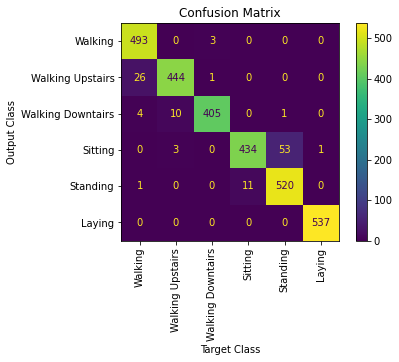

In [37]:
axplot= plt.subplot()
sklearn.metrics.plot_confusion_matrix(nrn_clf, X_test, y_test,ax=axplot)

# labels, title and ticks
axplot.set_xlabel('Target Class');
axplot.set_ylabel('Output Class'); 
axplot.set_title('Confusion Matrix'); 
axplot.xaxis.set_ticklabels(['Walking', 'Walking Upstairs','Walking Downtairs', 'Sitting', 'Standing', 'Laying']);
axplot.yaxis.set_ticklabels(['Walking', 'Walking Upstairs','Walking Downtairs', 'Sitting', 'Standing', 'Laying']);
plt.xticks(rotation = 90) 

# plt.tight_layout()
# plt.savefig("cm_1.pdf")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


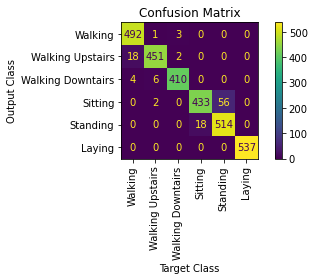

In [31]:
axplot= plt.subplot()
sklearn.metrics.plot_confusion_matrix(svm_clf, X_test, y_test,ax=axplot)

# labels, title and ticks
axplot.set_xlabel('Target Class');
axplot.set_ylabel('Output Class'); 
axplot.set_title('Confusion Matrix'); 
axplot.xaxis.set_ticklabels(['Walking', 'Walking Upstairs','Walking Downtairs', 'Sitting', 'Standing', 'Laying']);
axplot.yaxis.set_ticklabels(['Walking', 'Walking Upstairs','Walking Downtairs', 'Sitting', 'Standing', 'Laying']);
plt.xticks(rotation = 90) 


# plt.tight_layout()
# plt.savefig("cm_2.pdf")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


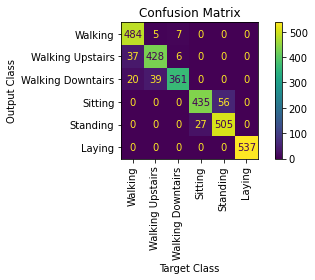

In [35]:
axplot= plt.subplot()
sklearn.metrics.plot_confusion_matrix(rnd_clf, X_test, y_test,ax=axplot)

# labels, title and ticks
axplot.set_xlabel('Target Class');
axplot.set_ylabel('Output Class'); 
axplot.set_title('Confusion Matrix'); 
axplot.xaxis.set_ticklabels(['Walking', 'Walking Upstairs','Walking Downtairs', 'Sitting', 'Standing', 'Laying']);
axplot.yaxis.set_ticklabels(['Walking', 'Walking Upstairs','Walking Downtairs', 'Sitting', 'Standing', 'Laying']);
plt.xticks(rotation = 90) 


# plt.tight_layout()
# plt.savefig("cm_3.pdf")